<a href="https://colab.research.google.com/github/GiovaniValdrighi/inferencia_causal/blob/master/vae_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of the trained Variational Autoencoder
## 1.Getting acess to the dataset on Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## 2.Installing Pyro and calling the modules

In [3]:
!pip3 install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl
!pip3 install torchvision
!pip3 install pyro-ppl

ERROR: torch-0.4.0-{platform}-linux_x86_64.whl is not a valid wheel filename.
     |████████████████████████████████| 491kB 2.8MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [0]:
import numpy as np
import pyro
import torch
from vae_build import VAE, ind_from_att

In [5]:
dataset_zip = np.load('/content/gdrive/My Drive/autoencoder/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', allow_pickle = True, encoding = 'bytes')
print('Keys in the dataset:', dataset_zip.files)
imgs = dataset_zip['imgs']
latents_values = dataset_zip['latents_values']
latents_classes = dataset_zip['latents_classes']
latents_sizes = dataset_zip['metadata'][()][b'latents_sizes']
latents_names = dataset_zip['metadata'][()][b'latents_names']

Keys in the dataset: ['metadata', 'imgs', 'latents_classes', 'latents_values']


# 3.Visualization of the VAE
After the variational autoencoder is already trained we can verify it working with samples of the dataset.

In [6]:
pyro.enable_validation(True)
pyro.clear_param_store()
#the training routine
use_CUDA = False
vae = VAE(latents_sizes, latents_names, use_CUDA = use_CUDA)
vae.load_state_dict(torch.load('/content/gdrive/My Drive/trained_movel_epoch_24.save'))

<All keys matched successfully>

First we can choose a random image on the dataset and visualize it before going through the VAE and after, passing by the encoder, generating a sample and going trough the decoder.

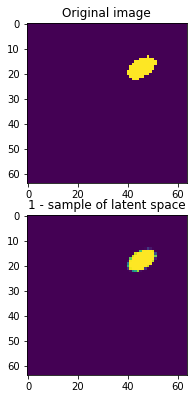

In [9]:
ind = np.random.randint(imgs.shape[0])
vae.run_img(imgs[ind], latents_classes[ind], 2)

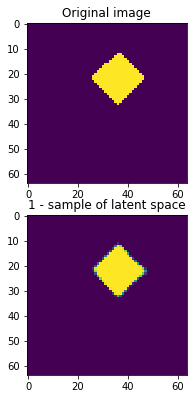

In [12]:
ind = np.random.randint(imgs.shape[0])
vae.run_img(imgs[ind], latents_classes[ind], 2)

Also we can choose each attribute with the function ind_from_att(). Here we choose a square if no rotation and with the lowest position values.

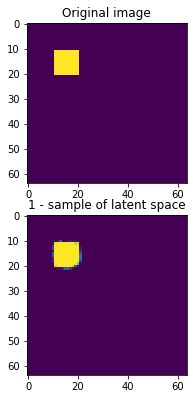

In [13]:
ind = ind_from_att(0, 0, 0, 0, 0, 0)
vae.run_img(imgs[ind], latents_classes[ind], 2)

Now choosing a big rotated ellipse.

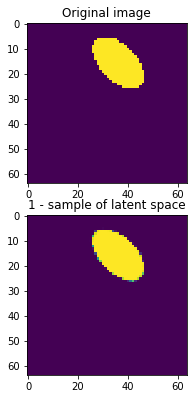

In [14]:
ind = ind_from_att(0, 1, 5, 34, 20, 0)
vae.run_img(imgs[ind], latents_classes[ind], 2)

The next step is to see the capability of the variational autoencoder to recreate the image when one attribute is changed in the Z space.
We choose a image from the dataset, encode it into the Z space, draw a sample and when we are going to pass it through the decoder, we change one of the attributes of the image.

Using the same image as above, we are going to change it shape.

Attribute changed was b'shape'


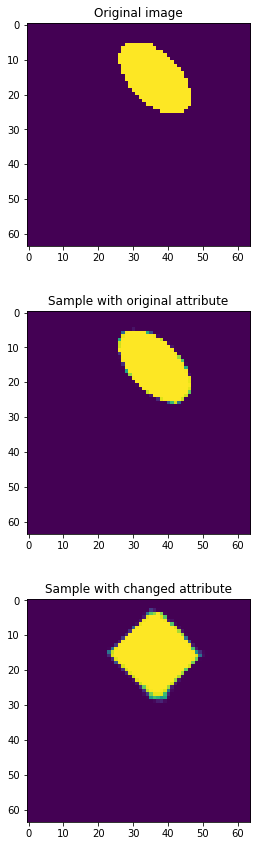

In [15]:
vae.change_attribute(imgs[ind], latents_classes[ind])

Now changing the orientation.

Attribute changed was b'orientation'


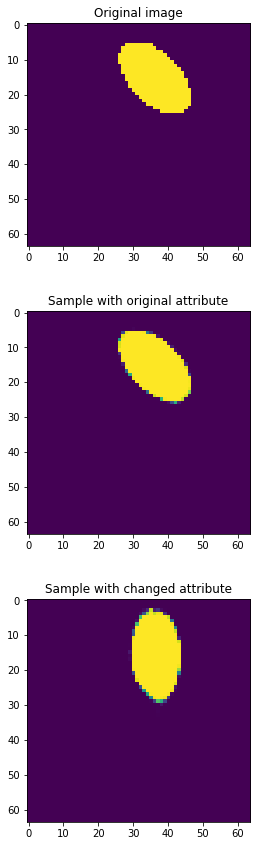

In [16]:
vae.change_attribute(imgs[ind], latents_classes[ind], attribute=3)